**Objective: Implement search algorithms and apply them to solve problems.**

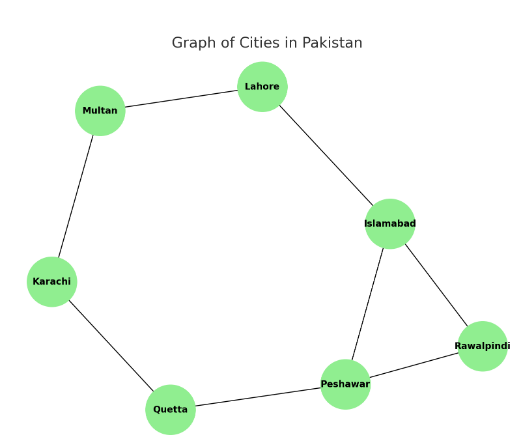

DFS Steps:

**Start at the first city:**

We begin from a specified city, such as Islamabad. We mark it as part of the current path.
**Explore one path as deep as possible:**

From Islamabad, we choose a neighboring city, like Rawalpindi, and continue exploring further from there.
If Rawalpindi has neighbors, we move to the next unvisited neighbor, such as Peshawar.
We keep moving to the next neighbor until we reach the destination city (Karachi), or there are no more neighbors to explore.

**Backtrack if necessary:**

If we reach a city (like Peshawar) that doesn’t lead to the destination or all its neighbors have been explored, we go back (backtrack) to the previous city.
We then try the next unvisited neighbor of the previous city.

**Continue until the destination is found:**

This process of moving forward (exploring) and backward (backtracking) continues until we find a path to the destination (Karachi).

**Store the path:**

Once we reach Karachi, we save this path. DFS doesn’t stop at finding one path—it keeps exploring to find all possible paths.

**Explore all paths:**

DFS will continue searching for alternative paths until all possibilities from the starting city (Islamabad) to the destination (Karachi) have been explored.

All Paths from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Peshawar -> Quetta -> Karachi
Islamabad -> Peshawar -> Quetta -> Karachi
Islamabad -> Lahore -> Multan -> Karachi


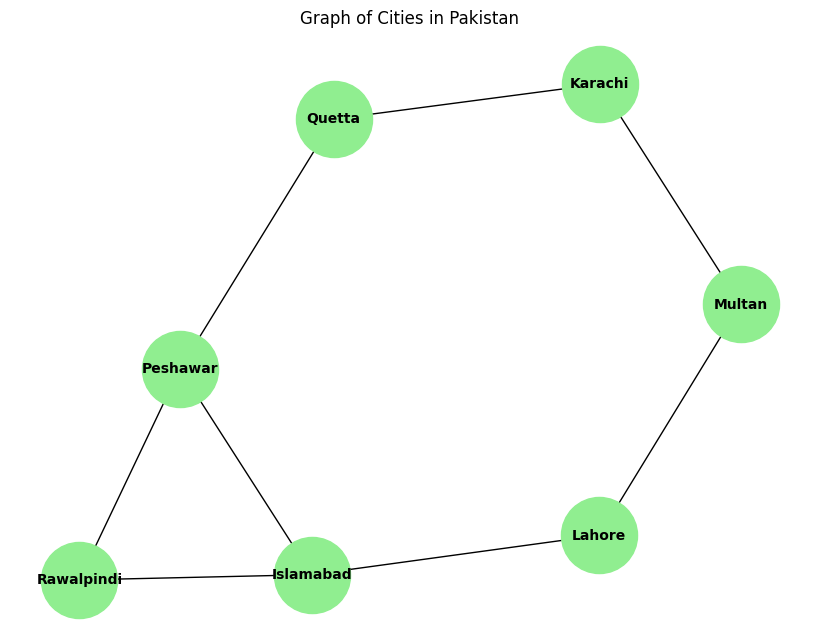

In [1]:
# Importing required libraries for plotting and graph manipulation
import matplotlib.pyplot as plt
import networkx as nx

# Define the Depth-First Search (DFS) function
def dfs(graph, start, goal, path=None):
    # If no path is provided, initialize an empty list for the path
    if path is None:
        path = []

    # Add the current starting node to the path
    path = path + [start]

    # If the current node is the goal, return the current path as a solution
    if start == goal:
        return [path]

    # If the starting node is not in the graph, return an empty list (no path)
    if start not in graph:
        return []

    # List to store all paths found from start to goal
    paths = []

    # Loop through each neighbor of the current starting node
    for neighbor in graph[start]:
        # Proceed if the neighbor hasn't already been visited in the current path
        if neighbor not in path:
            # Recursively call DFS on the neighbor
            new_paths = dfs(graph, neighbor, goal, path)
            # Append newly found paths to the paths list
            for p in new_paths:
                paths.append(p)

    # Return all paths found from start to goal
    return paths

# Define a graph representing cities in Pakistan and their connections
pakistan_cities_graph = {
    'Islamabad': ['Rawalpindi', 'Peshawar', 'Lahore'],
    'Rawalpindi': ['Islamabad', 'Peshawar'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan'],
    'Multan': ['Lahore', 'Karachi'],
    'Karachi': ['Multan', 'Quetta'],
    'Quetta': ['Peshawar', 'Karachi']
}

# Call the DFS function to find all paths from Islamabad to Karachi
paths = dfs(pakistan_cities_graph, 'Islamabad', 'Karachi')

# Print all the paths found from Islamabad to Karachi
print("All Paths from Islamabad to Karachi:")
for path in paths:
    print(" -> ".join(path))

# Function to plot the graph using NetworkX and Matplotlib
def plot_graph(graph):
    # Create a new undirected graph
    G = nx.Graph()

    # Add edges between nodes based on the graph dictionary
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Set up the plot size
    plt.figure(figsize=(8, 6))

    # Generate positions for the nodes using a spring layout
    pos = nx.spring_layout(G)

    # Draw the graph with labels and specific styling
    nx.draw(G, pos, with_labels=True, node_color='lightgreen',
            node_size=3000, font_size=10, font_weight='bold', edge_color='black')

    # Set the title of the plot
    plt.title("Graph of Cities in Pakistan")

    # Show the plot
    plt.show()

# Call the function to plot the graph of cities
plot_graph(pakistan_cities_graph)
